**Data processing for MNIST dataset**

In [1]:
import pickle
import gzip
import numpy as np
import tensorflow as tf

np.random.seed(100)
tf.random.set_seed(100)

def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')  # unzip and open
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1") 
    # training_data : a tuple with 2 entries 1. (28*28 * 50,000) / 2. right difits between (0,9) for the corresponding images
    # validation_data : similar but contains only 10,000 images 
    # test_data : similar but contains only 10,000 images
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()

    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    # e.g.) (0,0,0,0,0,1,0,0,0,0) --> 5
    # e.g.) (0,0,0,0,0,0,0,0,0,1) --> 9
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [2]:
training, validation, test = load_data()
training2, validation2, test2 = load_data_wrapper()

In [3]:
print(training[0].shape)
print(type(training[0]))
print(training[1].shape)
print(type(training[1]))
print()

(50000, 784)
<class 'numpy.ndarray'>
(50000,)
<class 'numpy.ndarray'>



In [4]:
training_data = list(training2)
test_data = list(test2)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers, models, initializers
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9760 - accuracy: 0.7714 - val_loss: 0.4149 - val_accuracy: 0.9023
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3301 - accuracy: 0.9145 - val_loss: 0.2663 - val_accuracy: 0.9275
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2381 - accuracy: 0.9330 - val_loss: 0.2162 - val_accuracy: 0.9389
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1964 - accuracy: 0.9451 - val_loss: 0.1895 - val_accuracy: 0.9440
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1696 - accuracy: 0.9518 - val_loss: 0.1725 - val_accuracy: 0.9498
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1514 - accuracy: 0.9564 - val_loss: 0.1624 - val_accuracy: 0.9517
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.9604 - val_loss: 0.1556 - val_accuracy:

In [7]:
test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.9600
0.13363677263259888
0.9599999785423279


[0.7714400291442871, 0.9144600033760071, 0.9330400228500366, 0.9451000094413757, 0.9518200159072876, 0.9563800096511841, 0.9603999853134155, 0.9635400176048279, 0.9660599827766418, 0.9681199789047241, 0.9702399969100952, 0.9719399809837341, 0.9732599854469299, 0.9746599793434143, 0.9754800200462341]
[0.9023000001907349, 0.9275000095367432, 0.9388999938964844, 0.9440000057220459, 0.9498000144958496, 0.95169997215271, 0.9531000256538391, 0.9538999795913696, 0.9556000232696533, 0.95660001039505, 0.957099974155426, 0.9577000141143799, 0.9571999907493591, 0.9581000208854675, 0.9599999785423279]
[0.9760295152664185, 0.3301447331905365, 0.23809240758419037, 0.1964152753353119, 0.16961249709129333, 0.15137681365013123, 0.13814599812030792, 0.1272100806236267, 0.11908823251724243, 0.1101687103509903, 0.10384035855531693, 0.09785812348127365, 0.0930572971701622, 0.08798161149024963, 0.08394269645214081]
[0.41486743092536926, 0.2662554979324341, 0.21619287133216858, 0.18946358561515808, 0.1724758

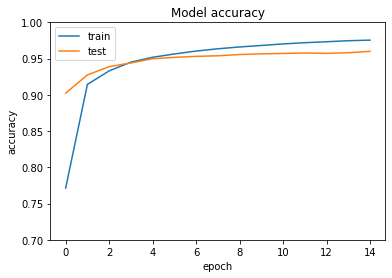

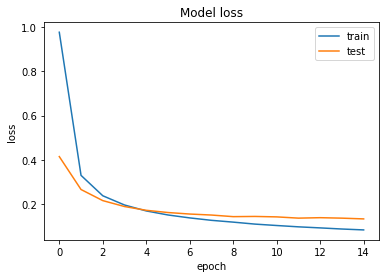

In [8]:
import matplotlib.pyplot as plt

print(history.history['accuracy'])
print(history.history['val_accuracy'])

print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6700 - accuracy: 0.8447 - val_loss: 0.2749 - val_accuracy: 0.9235
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2347 - accuracy: 0.9328 - val_loss: 0.2007 - val_accuracy: 0.9425
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1785 - accuracy: 0.9482 - val_loss: 0.1663 - val_accuracy: 0.9511
Epoch 4/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9569 - val_loss: 0.1507 - val_accuracy: 0.9537
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1224 - accuracy: 0.9647 - val_loss: 0.1294 - val_accuracy: 0.9596
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1049 - accuracy: 0.9697 - val_loss: 0.1197 - val_accuracy: 0.9631
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0915 - accuracy: 0.9735 - val_loss: 0.1123 - val_accuracy:

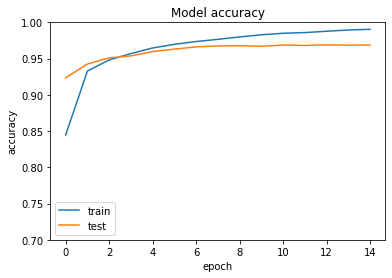

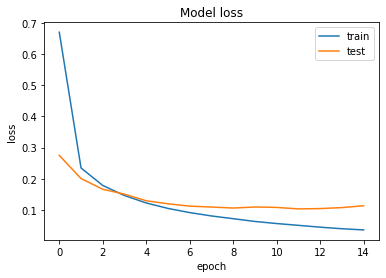

In [9]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5189 - accuracy: 0.8658 - val_loss: 0.2419 - val_accuracy: 0.9285
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2055 - accuracy: 0.9391 - val_loss: 0.1616 - val_accuracy: 0.9521
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1442 - accuracy: 0.9582 - val_loss: 0.1300 - val_accuracy: 0.9598
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1105 - accuracy: 0.9675 - val_loss: 0.1143 - val_accuracy: 0.9655
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0863 - accuracy: 0.9750 - val_loss: 0.0982 - val_accuracy: 0.9697
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0893 - val_accuracy: 0.9718
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0836 - val_accuracy:

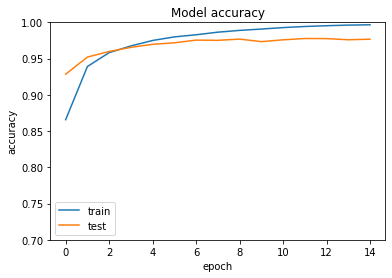

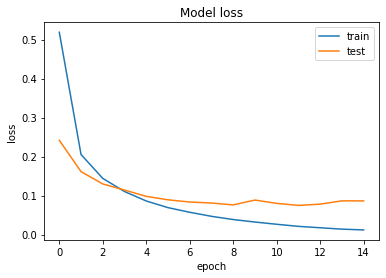

In [10]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4031 - accuracy: 0.8854 - val_loss: 0.2067 - val_accuracy: 0.9371
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1706 - accuracy: 0.9485 - val_loss: 0.1326 - val_accuracy: 0.9594
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1124 - accuracy: 0.9663 - val_loss: 0.1065 - val_accuracy: 0.9662
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0835 - accuracy: 0.9744 - val_loss: 0.0907 - val_accuracy: 0.9703
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.0783 - val_accuracy: 0.9751
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0716 - val_accuracy:

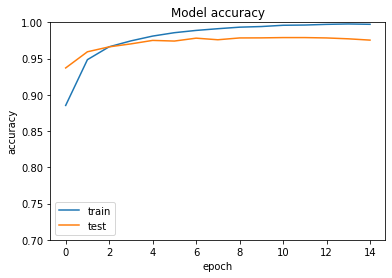

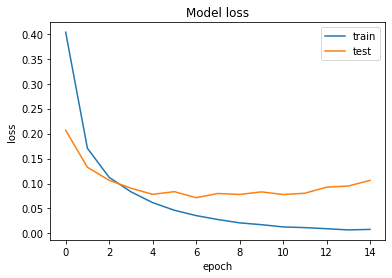

In [11]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3721 - accuracy: 0.8875 - val_loss: 0.1923 - val_accuracy: 0.9428
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1563 - accuracy: 0.9528 - val_loss: 0.1172 - val_accuracy: 0.9638
Epoch 3/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0983 - accuracy: 0.9700 - val_loss: 0.0937 - val_accuracy: 0.9702
Epoch 4/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0715 - accuracy: 0.9779 - val_loss: 0.0859 - val_accuracy: 0.9738
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0729 - val_accuracy: 0.9773
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0737 - val_ac

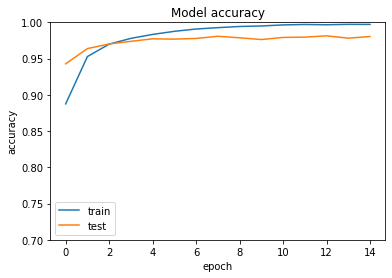

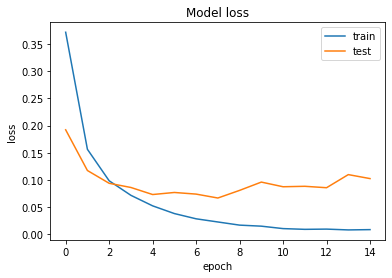

In [12]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4356 - accuracy: 0.5715 - val_loss: 0.7007 - val_accuracy: 0.7956
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5938 - accuracy: 0.8239 - val_loss: 0.4730 - val_accuracy: 0.8607
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4428 - accuracy: 0.8693 - val_loss: 0.3849 - val_accuracy: 0.8858
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8904 - val_loss: 0.3365 - val_accuracy: 0.8978
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3254 - accuracy: 0.9028 - val_loss: 0.3099 - val_accuracy: 0.9052
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.9124 - val_loss: 0.2921 - val_accuracy: 0.9105
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2709 - accuracy: 0.9193 - val_loss: 0.2773 - val_accuracy:

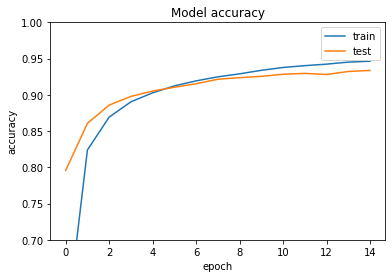

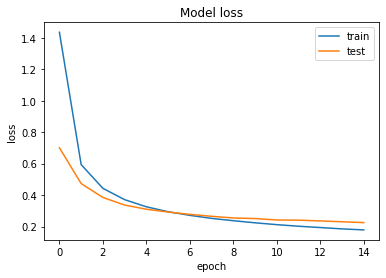

In [13]:
# different weight/bias initializations
# weight: randomNormal
# bias: zeros
initializer = initializers.RandomNormal(mean=0., stddev=1.)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0586 - accuracy: 0.1810 - val_loss: 1.8737 - val_accuracy: 0.2272
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8200 - accuracy: 0.2381 - val_loss: 1.7822 - val_accuracy: 0.2298
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7509 - accuracy: 0.2703 - val_loss: 1.7159 - val_accuracy: 0.3328
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6158 - accuracy: 0.3354 - val_loss: 1.5471 - val_accuracy: 0.3360
Epoch 5/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4788 - accuracy: 0.3759 - val_loss: 1.4323 - val_accuracy: 0.4133
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3782 - accuracy: 0.4335 - val_loss: 1.3549 - val_accuracy: 0.4416
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3075 - accuracy: 0.4576 - val_loss: 1.2915 - val_accuracy:

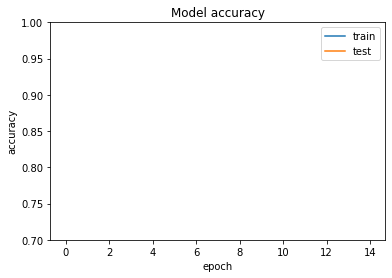

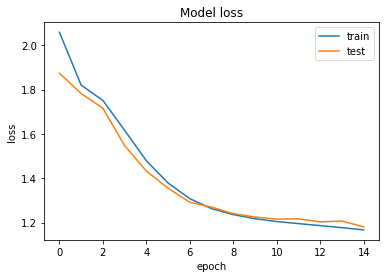

In [14]:
# different weight/bias initializations
# weight: randomUniform
# bias: zeros
initializer = initializers.RandomUniform(minval=0.05, maxval=0.05, seed=None)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1592 - accuracy: 0.7113 - val_loss: 0.4884 - val_accuracy: 0.8863
Epoch 2/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3930 - accuracy: 0.8982 - val_loss: 0.3262 - val_accuracy: 0.9111
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2928 - accuracy: 0.9198 - val_loss: 0.2774 - val_accuracy: 0.9207
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9299 - val_loss: 0.2432 - val_accuracy: 0.9307
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2162 - accuracy: 0.9391 - val_loss: 0.2196 - val_accuracy: 0.9367
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1926 - accuracy: 0.9452 - val_loss: 0.2047 - val_accuracy: 0.9421
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1737 - accuracy: 0.9507 - val_loss: 0.1904 - val_accuracy:

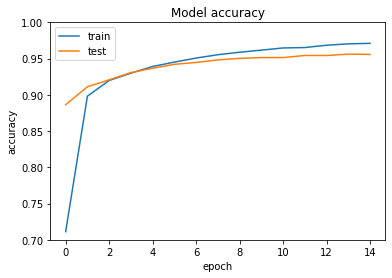

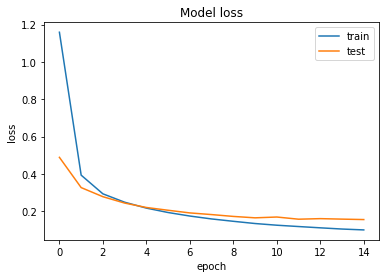

In [15]:
# different weight/bias initializations
# weight: TruncatedNormal
# bias: zeros
initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0024 - accuracy: 0.2112 - val_loss: 1.8880 - val_accuracy: 0.2411
Epoch 2/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8125 - accuracy: 0.2565 - val_loss: 1.7448 - val_accuracy: 0.2520
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6981 - accuracy: 0.3060 - val_loss: 1.6547 - val_accuracy: 0.3350
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6184 - accuracy: 0.3494 - val_loss: 1.5865 - val_accuracy: 0.4003
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5629 - accuracy: 0.3604 - val_loss: 1.5403 - val_accuracy: 0.3762
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5226 - accuracy: 0.3740 - val_loss: 1.5114 - val_accuracy: 0.3607
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4802 - accuracy: 0.4059 - val_loss: 1.4216 - val_accuracy:

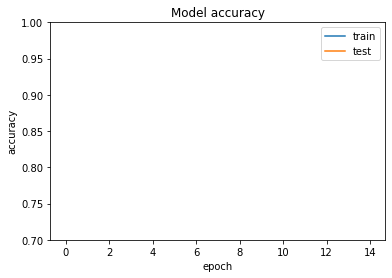

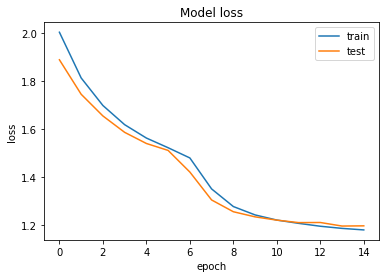

In [16]:
# different weight/bias initializations
# weight: zeros
# bias: zeros
initializer = initializers.Zeros()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3044 - accuracy: 0.1069 - val_loss: 2.3076 - val_accuracy: 0.1135
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3043 - accuracy: 0.1075 - val_loss: 2.3048 - val_accuracy: 0.0892
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3045 - accuracy: 0.1067 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3044 - accuracy: 0.1071 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3045 - accuracy: 0.1071 - val_loss: 2.3035 - val_accuracy: 0.1135
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3047 - accuracy: 0.1071 - val_loss: 2.3041 - val_accuracy: 0.1032
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3042 - accuracy: 0.1086 - val_loss: 2.3045 - val_accuracy:

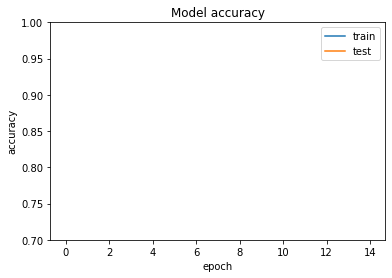

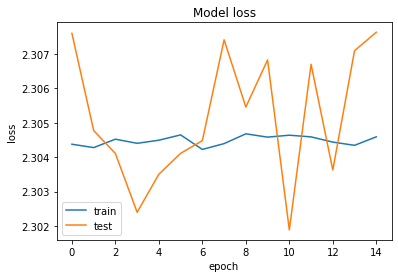

In [17]:
# different weight/bias initializations
# weight: Ones
# bias: zeros
initializer = initializers.Ones()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9556 - accuracy: 0.7851 - val_loss: 0.4041 - val_accuracy: 0.9022
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.9130 - val_loss: 0.2660 - val_accuracy: 0.9265
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2408 - accuracy: 0.9315 - val_loss: 0.2180 - val_accuracy: 0.9378
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2006 - accuracy: 0.9426 - val_loss: 0.1907 - val_accuracy: 0.9463
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1738 - accuracy: 0.9502 - val_loss: 0.1723 - val_accuracy: 0.9507
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1550 - accuracy: 0.9554 - val_loss: 0.1612 - val_accuracy: 0.9541
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1409 - accuracy: 0.9594 - val_loss: 0.1527 - val_accuracy:

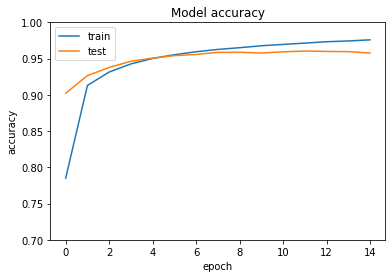

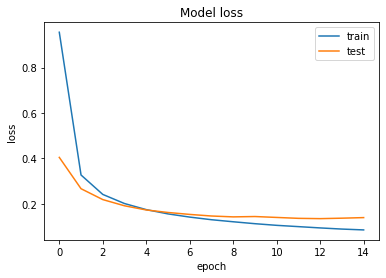

In [18]:
# different weight/bias initializations
# weight: xavier normal
# bias: zeros
initializer = initializers.GlorotNormal()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8900 - accuracy: 0.8099 - val_loss: 0.3757 - val_accuracy: 0.9064
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.9143 - val_loss: 0.2621 - val_accuracy: 0.9271
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2377 - accuracy: 0.9324 - val_loss: 0.2182 - val_accuracy: 0.9366
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1987 - accuracy: 0.9426 - val_loss: 0.1884 - val_accuracy: 0.9443
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1724 - accuracy: 0.9504 - val_loss: 0.1731 - val_accuracy: 0.9484
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1535 - accuracy: 0.9556 - val_loss: 0.1610 - val_accuracy: 0.9520
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1395 - accuracy: 0.9592 - val_loss: 0.1502 - val_accuracy:

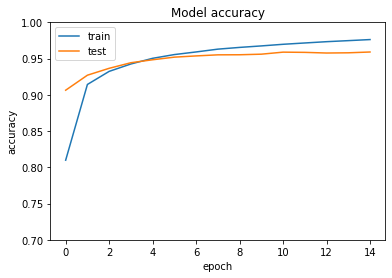

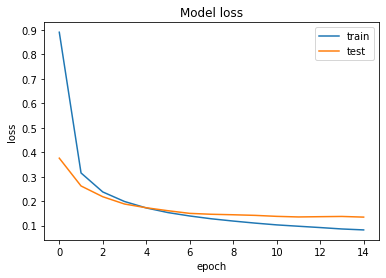

In [19]:
# different weight/bias initializations
# weight: HeNormal
# bias: zeros
initializer = initializers.HeNormal()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4024 - accuracy: 0.6702 - val_loss: 0.8608 - val_accuracy: 0.8022
Epoch 2/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6383 - accuracy: 0.8561 - val_loss: 0.4665 - val_accuracy: 0.8893
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4098 - accuracy: 0.8965 - val_loss: 0.3490 - val_accuracy: 0.9107
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3263 - accuracy: 0.9134 - val_loss: 0.3017 - val_accuracy: 0.9194
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.9231 - val_loss: 0.2706 - val_accuracy: 0.9257
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9293 - val_loss: 0.2512 - val_accuracy: 0.9321
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2289 - accuracy: 0.9343 - val_loss: 0.2354 - val_accuracy:

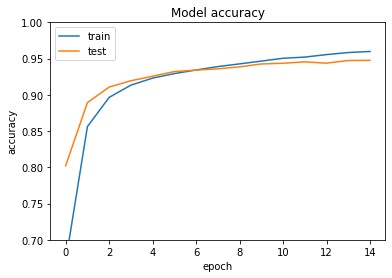

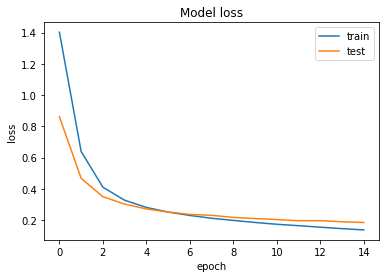

In [20]:
# different weight/bias initializations
# weight: Identity
# bias: zeros
initializer = initializers.Identity(gain=1.0)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0027 - accuracy: 0.7945 - val_loss: 0.4083 - val_accuracy: 0.9018
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3332 - accuracy: 0.9110 - val_loss: 0.2772 - val_accuracy: 0.9224
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9289 - val_loss: 0.2343 - val_accuracy: 0.9305
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2123 - accuracy: 0.9395 - val_loss: 0.2064 - val_accuracy: 0.9375
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1854 - accuracy: 0.9469 - val_loss: 0.1862 - val_accuracy: 0.9447
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1659 - accuracy: 0.9524 - val_loss: 0.1732 - val_accuracy: 0.9485
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1511 - accuracy: 0.9570 - val_loss: 0.1660 - val_accuracy:

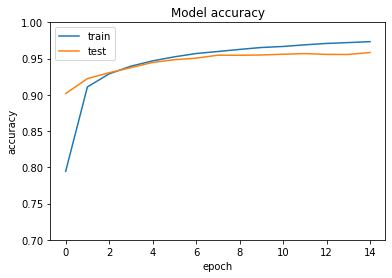

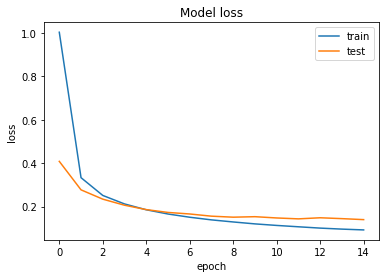

In [21]:
# different weight/bias initializations
# weight: orthogonal
# bias: zeros
initializer = initializers.Orthogonal(gain=1.0)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0335 - accuracy: 0.7857 - val_loss: 0.4286 - val_accuracy: 0.9012
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3431 - accuracy: 0.9095 - val_loss: 0.2854 - val_accuracy: 0.9219
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2541 - accuracy: 0.9286 - val_loss: 0.2350 - val_accuracy: 0.9334
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2119 - accuracy: 0.9398 - val_loss: 0.2083 - val_accuracy: 0.9401
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1850 - accuracy: 0.9469 - val_loss: 0.1911 - val_accuracy: 0.9449
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1658 - accuracy: 0.9532 - val_loss: 0.1798 - val_accuracy: 0.9479
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1512 - accuracy: 0.9567 - val_loss: 0.1716 - val_accuracy:

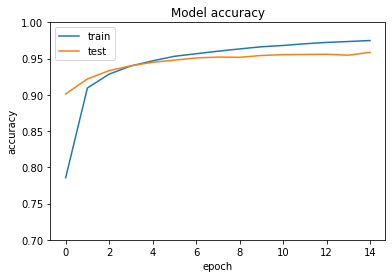

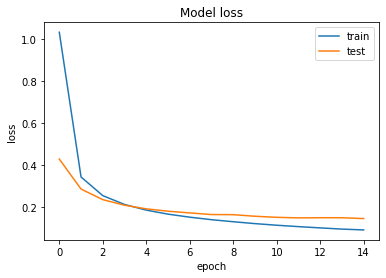

In [25]:
# different weight/bias initializations
# weight: xavier uniform
# bias: ones
initializer = initializers.ones()
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', bias_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9820 - accuracy: 0.7762 - val_loss: 0.4305 - val_accuracy: 0.8970
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3443 - accuracy: 0.9096 - val_loss: 0.2789 - val_accuracy: 0.9223
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9302 - val_loss: 0.2243 - val_accuracy: 0.9369
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2061 - accuracy: 0.9413 - val_loss: 0.1937 - val_accuracy: 0.9418
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1779 - accuracy: 0.9487 - val_loss: 0.1744 - val_accuracy: 0.9465
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1577 - accuracy: 0.9548 - val_loss: 0.1607 - val_accuracy: 0.9527
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1425 - accuracy: 0.9593 - val_loss: 0.1542 - val_accuracy:

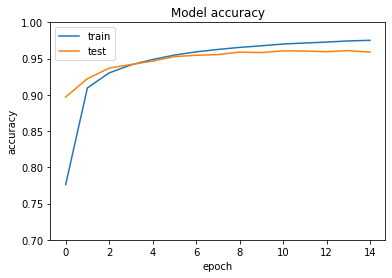

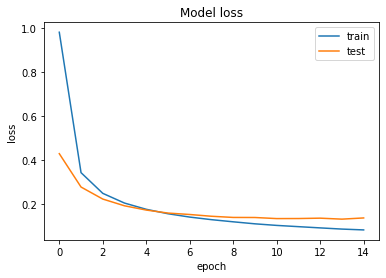

In [26]:
# different weight/bias initializations
# weight: xavier uniform
# bias: random normal
initializer = initializers.RandomNormal()
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', bias_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9728 - accuracy: 0.7893 - val_loss: 0.4089 - val_accuracy: 0.9071
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3277 - accuracy: 0.9153 - val_loss: 0.2610 - val_accuracy: 0.9292
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2417 - accuracy: 0.9336 - val_loss: 0.2155 - val_accuracy: 0.9406
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2031 - accuracy: 0.9423 - val_loss: 0.1889 - val_accuracy: 0.9454
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1780 - accuracy: 0.9490 - val_loss: 0.1736 - val_accuracy: 0.9499
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1600 - accuracy: 0.9544 - val_loss: 0.1602 - val_accuracy: 0.9540
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1464 - accuracy: 0.9580 - val_loss: 0.1547 - val_accuracy:

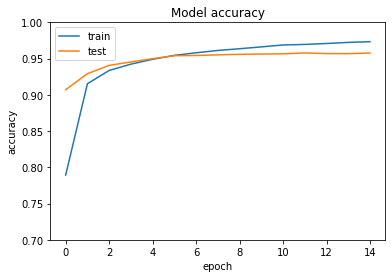

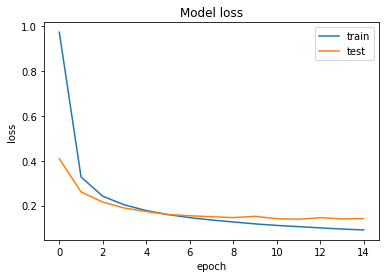

In [27]:
# different weight/bias initializations
# weight: default
# bias: truncated normal
initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05)
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', bias_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9559 - accuracy: 0.7826 - val_loss: 0.4122 - val_accuracy: 0.9022
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3314 - accuracy: 0.9119 - val_loss: 0.2677 - val_accuracy: 0.9238
Epoch 3/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2421 - accuracy: 0.9306 - val_loss: 0.2252 - val_accuracy: 0.9332
Epoch 4/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2016 - accuracy: 0.9416 - val_loss: 0.1963 - val_accuracy: 0.9429
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1759 - accuracy: 0.9485 - val_loss: 0.1771 - val_accuracy: 0.9470
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1580 - accuracy: 0.9537 - val_loss: 0.1646 - val_accuracy: 0.9511
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1443 - accuracy: 0.9572 - val_loss: 0.1577 - val_accuracy:

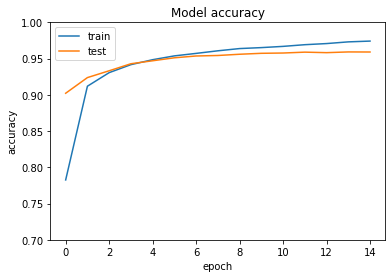

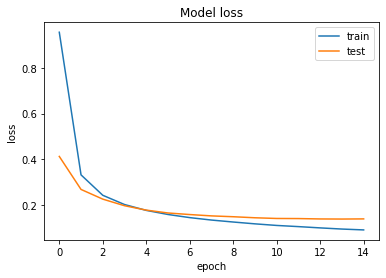

In [29]:
# different weight/bias initializations
# weight: default
# bias: random uniform
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05)
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', bias_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', bias_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8937 - val_loss: 0.2147 - val_accuracy: 0.9382
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2002 - accuracy: 0.9395 - val_loss: 0.1950 - val_accuracy: 0.9394
Epoch 3/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1714 - accuracy: 0.9477 - val_loss: 0.1743 - val_accuracy: 0.9496
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1597 - accuracy: 0.9512 - val_loss: 0.1934 - val_accuracy: 0.9425
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1463 - accuracy: 0.9555 - val_loss: 0.1782 - val_accuracy: 0.9475
Epoch 6/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1401 - accuracy: 0.9574 - val_loss: 0.1613 - val_accuracy: 0.9524
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1340 - accuracy: 0.9591 - val_loss: 0.1678 - val_accuracy: 0.9527
Epo

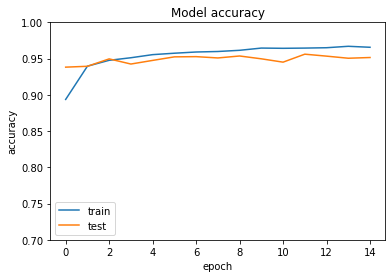

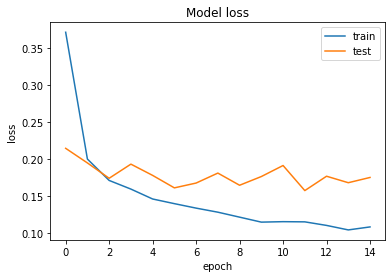

In [35]:
# different learning rate
model = models.Sequential()
lr = 1e-2
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8457 - accuracy: 0.7314 - val_loss: 0.6985 - val_accuracy: 0.7832
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6503 - accuracy: 0.8089 - val_loss: 0.5813 - val_accuracy: 0.8369
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6322 - accuracy: 0.8195 - val_loss: 0.6515 - val_accuracy: 0.7937
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6620 - accuracy: 0.8048 - val_loss: 0.6113 - val_accuracy: 0.8347
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5840 - accuracy: 0.8367 - val_loss: 0.5157 - val_accuracy: 0.8586
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5835 - accuracy: 0.8357 - val_loss: 0.5619 - val_accuracy: 0.8476
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5910 - accuracy: 0.8305 - val_loss: 0.5250 - val_accuracy:

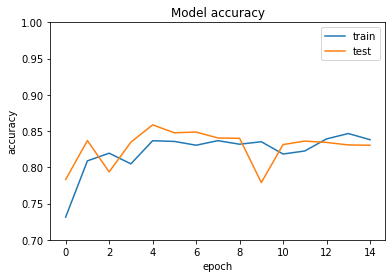

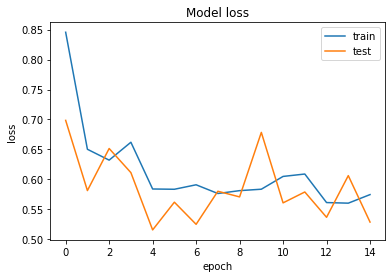

In [36]:
# different learning rate
model = models.Sequential()
lr = 1e-1
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 2.9243 - accuracy: 0.1018 - val_loss: 2.7050 - val_accuracy: 0.1028
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9170 - accuracy: 0.0985 - val_loss: 3.0528 - val_accuracy: 0.1010
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9007 - accuracy: 0.0999 - val_loss: 3.3410 - val_accuracy: 0.1010
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9117 - accuracy: 0.0982 - val_loss: 2.7143 - val_accuracy: 0.1135
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9453 - accuracy: 0.0990 - val_loss: 2.8466 - val_accuracy: 0.0958
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.8895 - accuracy: 0.1015 - val_loss: 2.9678 - val_accuracy: 0.1010
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9153 - accuracy: 0.0997 - val_loss: 3.2762 - val_accuracy:

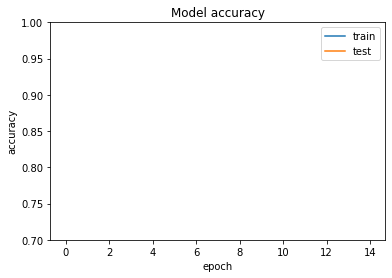

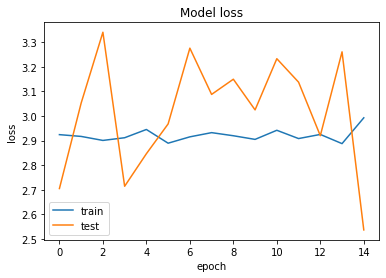

In [37]:
# different learning rate
model = models.Sequential()
lr = 1
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 2.0967 - accuracy: 0.4462 - val_loss: 1.8501 - val_accuracy: 0.6970
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6397 - accuracy: 0.7114 - val_loss: 1.4264 - val_accuracy: 0.7625
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2596 - accuracy: 0.7722 - val_loss: 1.0936 - val_accuracy: 0.8096
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9792 - accuracy: 0.8182 - val_loss: 0.8602 - val_accuracy: 0.8443
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7872 - accuracy: 0.8471 - val_loss: 0.7027 - val_accuracy: 0.8662
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6561 - accuracy: 0.8660 - val_loss: 0.5944 - val_accuracy: 0.8761
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5646 - accuracy: 0.8769 - val_loss: 0.5171 - val_accuracy: 0.8855
Epo

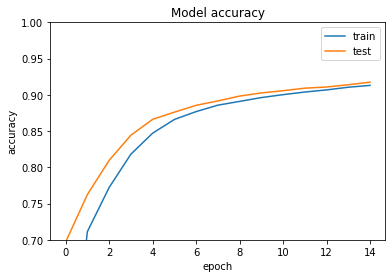

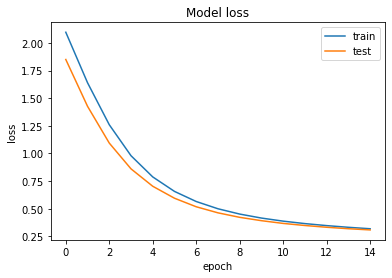

In [38]:
# different learning rate
model = models.Sequential()
lr = 1e-4
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6869 - accuracy: 0.8489 - val_loss: 0.3429 - val_accuracy: 0.9130
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3053 - accuracy: 0.9167 - val_loss: 0.2612 - val_accuracy: 0.9262
Epoch 3/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.2480 - accuracy: 0.9288 - val_loss: 0.2309 - val_accuracy: 0.9329
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2186 - accuracy: 0.9369 - val_loss: 0.2111 - val_accuracy: 0.9380
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1984 - accuracy: 0.9431 - val_loss: 0.1994 - val_accuracy: 0.9412
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1835 - accuracy: 0.9467 - val_loss: 0.1912 - val_accuracy: 0.9443
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1715 - accuracy: 0.9501 - val_loss: 0.1818 - val_accuracy

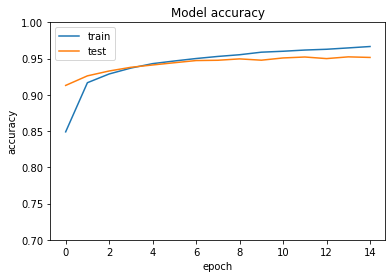

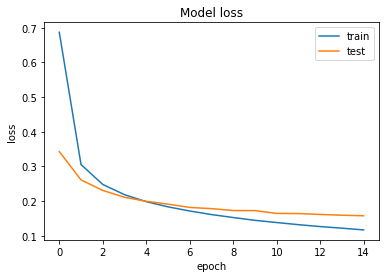

In [ ]:
# trying different number of hidden layer
# 1 hidden layer 

model = models.Sequential()

# 1 hidden layer
model.add(layers.Dense(25, activation='sigmoid'))
# model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1889 - accuracy: 0.6768 - val_loss: 0.4803 - val_accuracy: 0.8853
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3759 - accuracy: 0.9016 - val_loss: 0.3022 - val_accuracy: 0.9192
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2727 - accuracy: 0.9250 - val_loss: 0.2422 - val_accuracy: 0.9327
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2254 - accuracy: 0.9373 - val_loss: 0.2152 - val_accuracy: 0.9398
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1948 - accuracy: 0.9451 - val_loss: 0.1973 - val_accuracy: 0.9443
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1743 - accuracy: 0.9505 - val_loss: 0.1862 - val_accuracy: 0.9466
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1574 - accuracy: 0.9551 - val_loss: 0.1788 - val_accuracy:

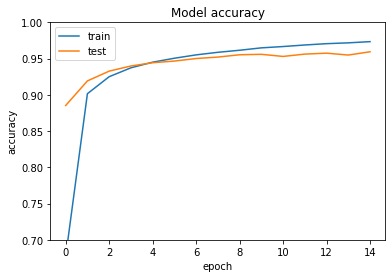

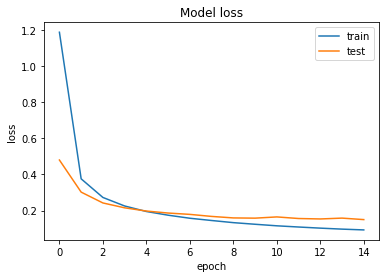

In [ ]:
# trying different number of hidden layer
# 3 hidden layer 

model = models.Sequential()

# 3 hidden layer
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()